In [86]:
import pandas as pd
import numpy as np

In [2]:
df_1 = pd.read_csv("C:\\Users\\My PC\\Documents\\DATA ANALYSIS\\toye\\imf-dm-export-20230513.csv")
df_1.head()

,Country,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Continent
0,Algeria,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,...,3.8,3.7,3.2,1.4,1.2,1.0,-5.1,3.4,2.9,Africa
1,Angola,13.7,3.0,11.0,15.0,11.5,14.0,11.2,0.9,4.9,...,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.1,2.8,Africa
2,Botswana,7.4,5.4,1.4,5.0,6.0,5.8,3.3,-14.1,10.1,...,5.7,-4.9,7.2,4.1,4.2,3.0,-8.7,11.8,6.4,Africa
3,Burkina Faso,4.4,7.8,4.5,8.7,6.3,4.1,5.8,3.0,8.4,...,4.3,3.9,6.0,6.2,6.6,5.7,1.9,6.9,2.5,Africa
4,Ghana,4.6,5.1,5.4,6.2,5.8,4.1,9.0,5.7,7.8,...,2.9,2.1,3.4,8.1,6.2,6.5,0.5,5.4,3.2,Africa


The dataset was gotten from Kaggle, World GDP Growth (1980-2028). To put scope put the analysis and study,the dataset was profiled.

First, Data Cleaning, all row with an empty cell, or the word "No data" were deleted. Then, a period of 20 years (2022-2022) observation was selected, that is, every other "year" below 2002 and above 2022 were deleted.

The Dataset set was further manipulated by manually adding a "Continent" column, Six Continents were observed which are "Asia, Africa, Australia, Europe, North America, South America". This column was used to select 10 countries from each continent.

In conclusion, the dataset contains 60 countries (10 countries from 6 continents) with an outlook period of 20years, 2002 -2022.

In [151]:
df_1.describe()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.715000,5.090000,5.733333,4.721667,5.088333,5.166667,3.93000,-0.028333,4.448333,4.558333,...,3.285000,3.356667,3.516667,2.996667,2.618333,2.656667,2.038333,-5.845000,5.321667,4.041667
std,4.822223,10.664827,7.347839,3.368905,4.280468,3.630972,4.06007,4.725125,4.078156,3.155103,...,2.741015,2.436541,4.161656,4.002794,3.716865,3.771677,4.836587,6.033366,5.049218,3.644513
min,-10.900000,-7.800000,-1.900000,-3.700000,-4.000000,-2.500000,-5.30000,-14.100000,-5.700000,-1.700000,...,-1.600000,-3.900000,-6.200000,-17.000000,-15.700000,-19.700000,-27.700000,-30.000000,-12.100000,-6.000000
25%,0.650000,1.900000,3.100000,2.625000,2.600000,2.750000,0.90000,-3.250000,1.775000,2.500000,...,1.175000,1.700000,1.775000,1.800000,1.400000,1.625000,0.700000,-8.400000,3.325000,2.500000
50%,3.150000,3.950000,4.600000,4.400000,4.750000,4.500000,4.00000,-0.350000,4.100000,4.250000,...,2.950000,3.350000,3.300000,3.000000,2.800000,2.750000,2.200000,-5.050000,5.300000,3.500000
75%,5.100000,5.850000,6.725000,6.225000,6.625000,6.900000,6.25000,3.000000,7.350000,6.450000,...,5.125000,5.025000,4.825000,4.700000,4.800000,4.250000,4.400000,-2.075000,7.825000,6.000000
max,14.600000,81.800000,53.400000,15.000000,28.100000,18.200000,17.50000,13.100000,17.700000,13.900000,...,11.100000,8.600000,24.400000,15.200000,9.000000,8.600000,13.800000,6.200000,15.300000,14.500000


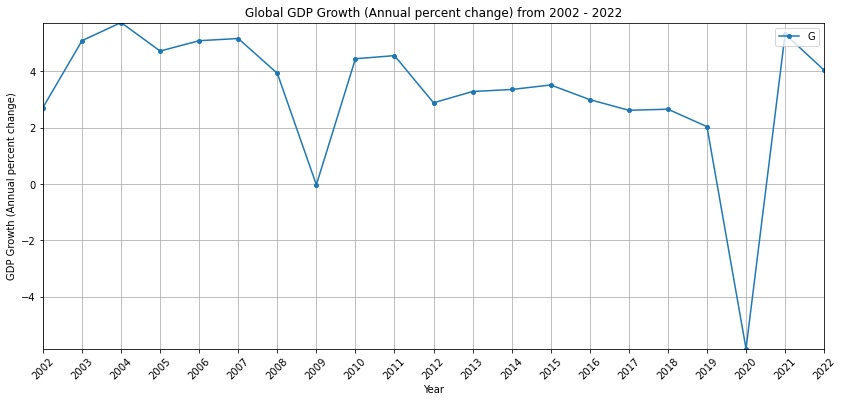

In [143]:
# Create a customized legend
custom_labels = 'Global_Outlook'

all_countries = df_1['Country'].unique()

plt.figure(figsize=(14, 6))


country_data = df_1[df_1['Country'] == all_countries]
country_data = country_data.replace('no data', pd.NA).dropna(axis=1)
years = country_data.columns[1:-1].astype(int)
gdp_growth_mean_flattened = country_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
    
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4)

# Additional settings for the plot
plt.grid(True)
plt.xlim(min(years), max(years))
plt.ylim(min(gdp_growth_mean_flattened), max(gdp_growth_mean_flattened))
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual percent change)')
plt.title(f'Global GDP Growth (Annual percent change) from 2002 - 2022')
plt.legend(custom_labels, loc='upper right')
plt.xticks(years, rotation=45)
plt.show()


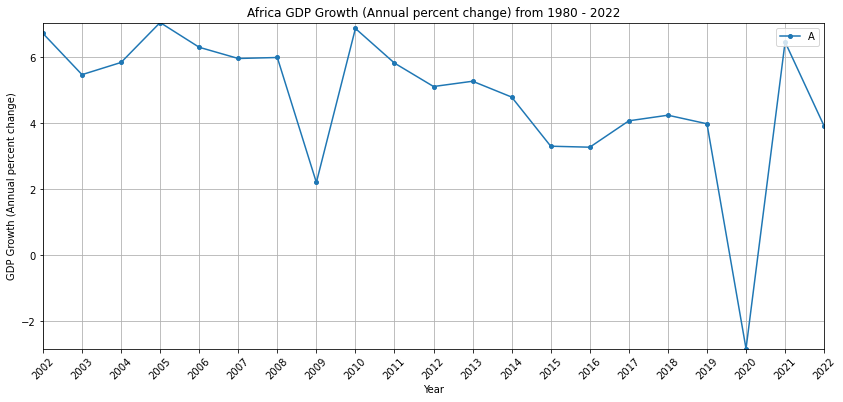

In [145]:
Continent_name = 'Africa'

plt.figure(figsize=(14, 6))

Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace('no data', pd.NA).dropna(axis=1)
years = Continent_data.columns[1:-1].astype(int)

gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4)
# Additional settings for the plot
plt.grid(True)
plt.xlim(min(years), max(years))
plt.ylim(min(gdp_growth_mean_flattened), max(gdp_growth_mean_flattened))
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual percent change)')
plt.title(f'Africa GDP Growth (Annual percent change) from 2002 - 2022')
plt.legend(Continent_name, loc='upper right')
plt.xticks(years, rotation=45)
plt.show()

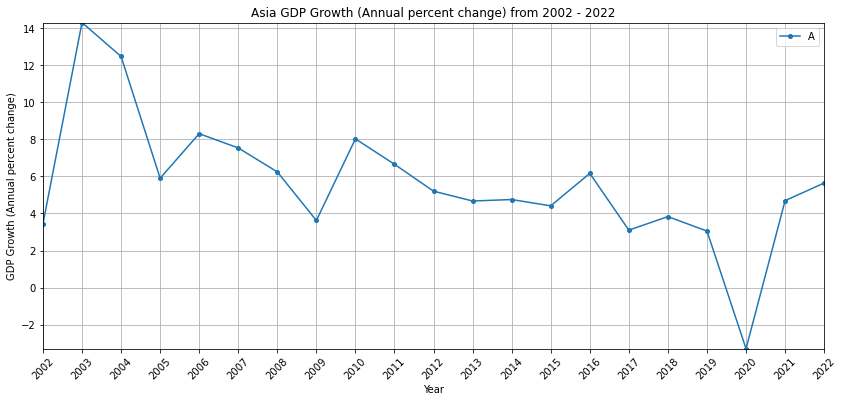

In [146]:
Continent_name = 'Asia'

plt.figure(figsize=(14, 6))

Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace('no data', pd.NA).dropna(axis=1)
years = Continent_data.columns[1:-1].astype(int)

gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4)
# Additional settings for the plot
plt.grid(True)
plt.xlim(min(years), max(years))
plt.ylim(min(gdp_growth_mean_flattened), max(gdp_growth_mean_flattened))
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual percent change)')
plt.title(f'Asia GDP Growth (Annual percent change) from 2002 - 2022')
plt.legend(Continent_name, loc='upper right')
plt.xticks(years, rotation=45)
plt.show()

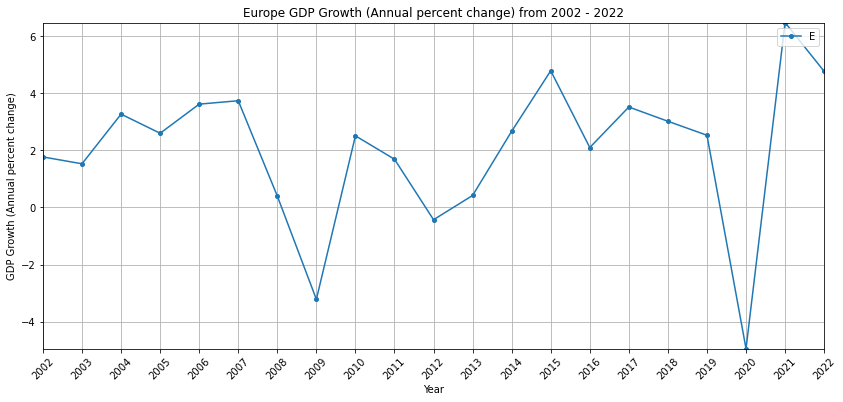

In [147]:
Continent_name = 'Europe'

plt.figure(figsize=(14, 6))

Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace('no data', pd.NA).dropna(axis=1)
years = Continent_data.columns[1:-1].astype(int)

gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4)
# Additional settings for the plot
plt.grid(True)
plt.xlim(min(years), max(years))
plt.ylim(min(gdp_growth_mean_flattened), max(gdp_growth_mean_flattened))
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual percent change)')
plt.title(f'Europe GDP Growth (Annual percent change) from 2002 - 2022')
plt.legend(Continent_name, loc='upper right')
plt.xticks(years, rotation=45)
plt.show()

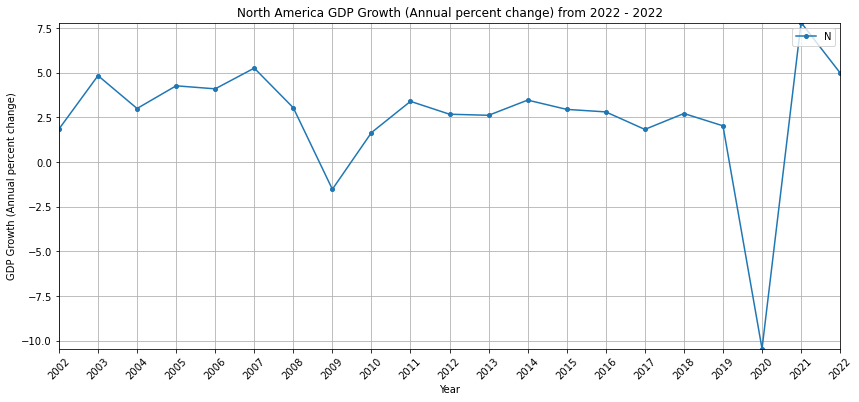

In [148]:
Continent_name = 'North America'

plt.figure(figsize=(14, 6))

Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace('no data', pd.NA).dropna(axis=1)
years = Continent_data.columns[1:-1].astype(int)

gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4)
# Additional settings for the plot
plt.grid(True)
plt.xlim(min(years), max(years))
plt.ylim(min(gdp_growth_mean_flattened), max(gdp_growth_mean_flattened))
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual percent change)')
plt.title(f'North America GDP Growth (Annual percent change) from 2002 - 2022')
plt.legend(Continent_name, loc='upper right')
plt.xticks(years, rotation=45)
plt.show()

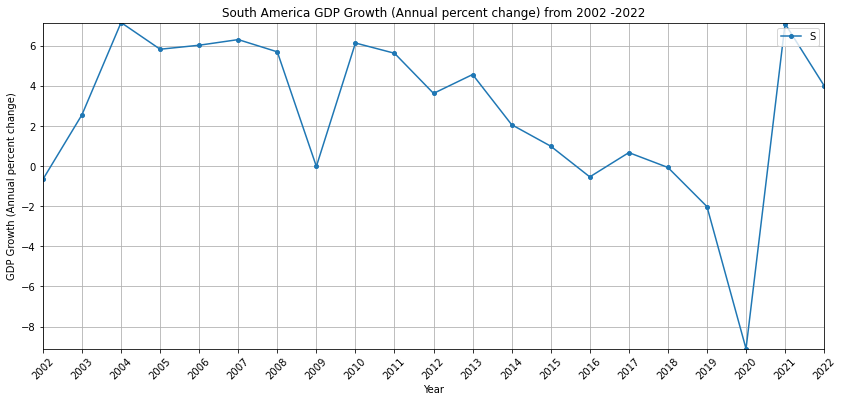

In [149]:
Continent_name = 'South America'

plt.figure(figsize=(14, 6))

Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace('no data', pd.NA).dropna(axis=1)
years = Continent_data.columns[1:-1].astype(int)

gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4)
# Additional settings for the plot
plt.grid(True)
plt.xlim(min(years), max(years))
plt.ylim(min(gdp_growth_mean_flattened), max(gdp_growth_mean_flattened))
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual percent change)')
plt.title(f'South America GDP Growth (Annual percent change) from 2002 -2022')
plt.legend(Continent_name, loc='upper right')
plt.xticks(years, rotation=45)
plt.show()

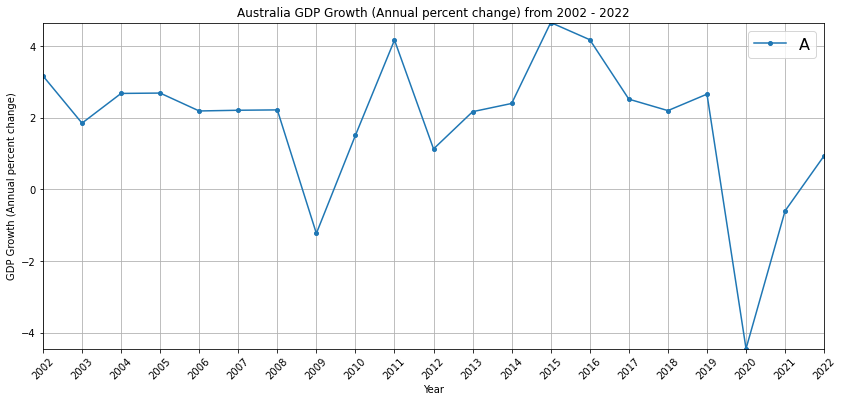

In [150]:
Continent_name = 'Australia'

plt.figure(figsize=(14, 6))

Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace('no data', pd.NA).dropna(axis=1)
years = Continent_data.columns[1:-1].astype(int)

gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4)
# Additional settings for the plot
plt.grid(True)
plt.xlim(min(years), max(years))
plt.ylim(min(gdp_growth_mean_flattened), max(gdp_growth_mean_flattened))
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual percent change)')
plt.title(f'Australia GDP Growth (Annual percent change) from 2002 - 2022')
plt.legend(Continent_name, loc='upper right', fontsize=16)
plt.xticks(years, rotation=45)
plt.show()

([<matplotlib.axis.XTick at 0x2b312380dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

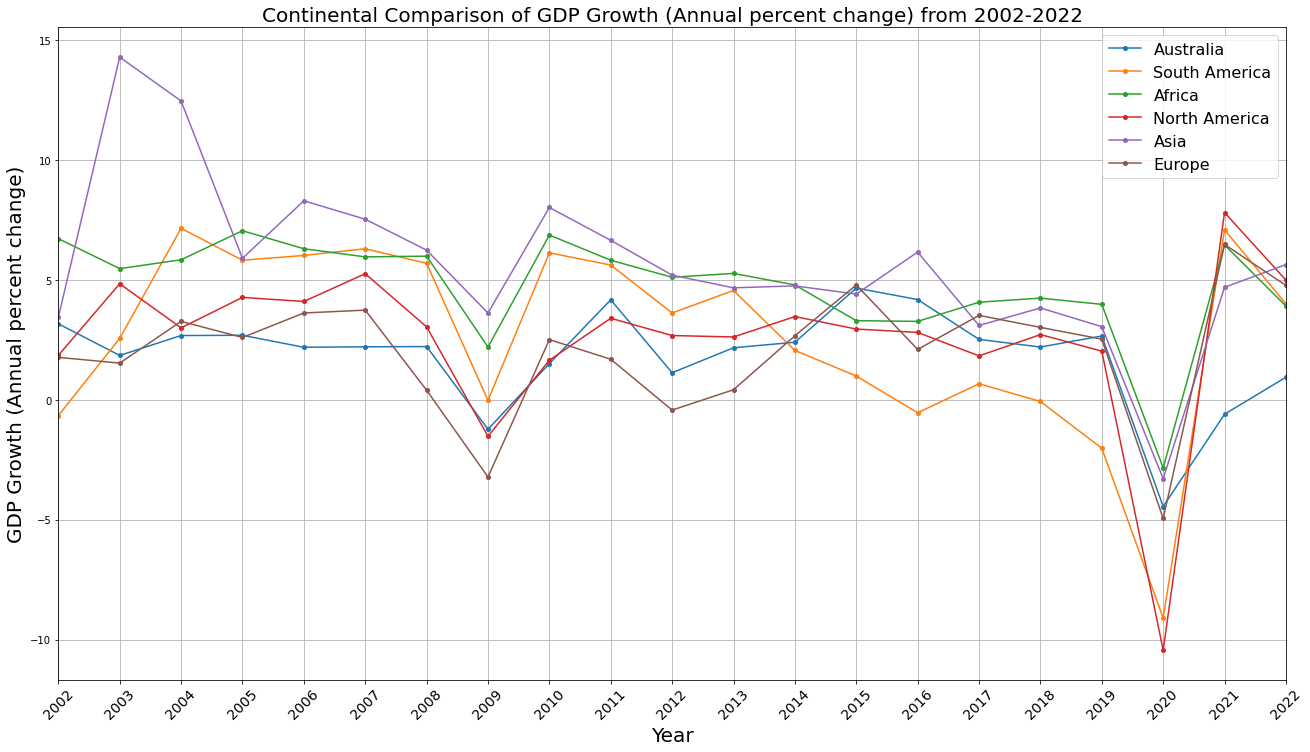

In [139]:
plt.figure(figsize=(22, 12))

# Plot for Australia
Continent_name = 'Australia'
Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace('no data', pd.NA).dropna(axis=1)
years = Continent_data.columns[1:-1].astype(int)
gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4, label=Continent_name)

# Plot for South America
Continent_name = 'South America'
Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace(' no data', pd.NA).dropna(axis=1)
gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4, label=Continent_name)

# Plot for Africa
Continent_name = 'Africa'
Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace(' no data', pd.NA).dropna(axis=1)
gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4, label=Continent_name)

# Plot for North America
Continent_name = 'North America'
Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace(' no data', pd.NA).dropna(axis=1)
gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4, label=Continent_name)

# Plot for Asia
Continent_name = 'Asia'
Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace(' no data', pd.NA).dropna(axis=1)
gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4, label=Continent_name)

# Plot for Europe
Continent_name = 'Europe'
Continent_data = df_1[df_1['Continent'] == Continent_name]
Continent_data = Continent_data.replace(' no data', pd.NA).dropna(axis=1)
gdp_growth_mean_flattened = Continent_data.iloc[:, 1:-1].mean(axis=0).values.flatten().astype(float)
plt.plot(years, gdp_growth_mean_flattened, linestyle='-', marker='o', markersize=4, label=Continent_name)

# Additional settings for the plot
plt.grid(True)
plt.xlim(min(years), max(years))
plt.xlabel('Year', fontsize=20)  # Adjust the fontsize as needed
plt.ylabel('GDP Growth (Annual percent change)', fontsize=20)
plt.title('Continental Comparison of GDP Growth (Annual percent change) from 2002-2022', fontsize=20)
plt.legend(loc='upper right', fontsize=16)
plt.xticks(years, rotation=45, fontsize=14)  # Adjust the fontsize as needed